In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class,TSNE1,TSNE2
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale,49.638161,-3.774621
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale,48.755077,-5.635662
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale,47.445709,-7.201050
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale,45.612125,-8.398252
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale,44.612492,-8.168547


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

In [ ]:
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

## raw data

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

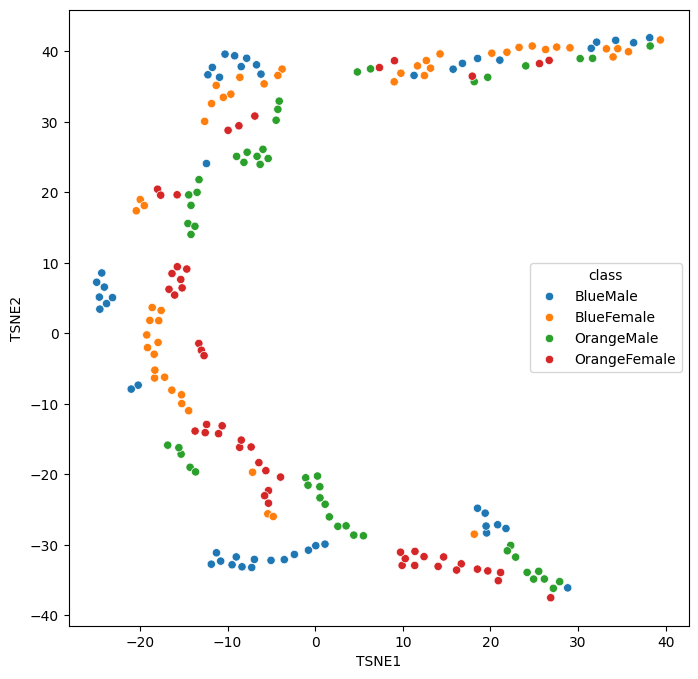

In [ ]:
crabs_tsne = TSNE(n_components=2, perplexity=10,n_iter=2000,init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1','TSNE2']] = crabs_tsne
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_data)

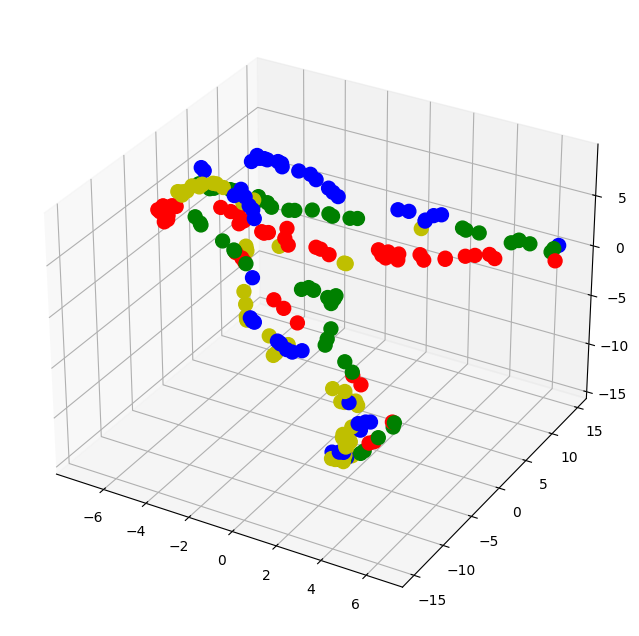

In [ ]:
crabs_tsne = TSNE(n_components=3, perplexity=10,n_iter=2000,init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1','TSNE2','TSNE3']] = crabs_tsne

colors_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
plt.scatter(crabs_data.TSNE1, crabs_data.TSNE2, zs=crabs_data.TSNE3,depthshade=False,
            c=crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)



#Scaled data

In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])


In [ ]:
crabs_min_max.head(50)

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class,TSNE1,TSNE2,TSNE3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.815665,-4.534365,-14.028638
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,1.672808,-5.642128,-13.684124
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,1.595498,-6.219307,-12.674453
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,2.139449,-7.016220,-11.851884
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,2.336125,-7.015674,-11.743138
5,Blue,Male,6,0.226415,0.182482,0.252280,0.250667,0.238710,BlueMale,3.696882,-9.309132,-7.308454
6,Blue,Male,7,0.245283,0.248175,0.276596,0.266667,0.238710,BlueMale,3.743853,-9.877357,-6.315549
7,Blue,Male,8,0.276730,0.189781,0.297872,0.301333,0.277419,BlueMale,4.492471,-10.648127,-5.231019
8,Blue,Male,9,0.289308,0.226277,0.288754,0.285333,0.232258,BlueMale,4.192555,-10.317641,-5.615893
9,Blue,Male,10,0.289308,0.291971,0.319149,0.325333,0.270968,BlueMale,3.767359,-11.496742,-3.361228


In [ ]:
crabs_tsne = TSNE(n_components=2, perplexity=10,n_iter=1000,init='random').fit_transform(crabs_min_max[data_columns])
crabs_data[['TSNE1','TSNE2']] = crabs_tsne
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_data)